<a href="https://colab.research.google.com/github/jupiterthought/my-reposito/blob/main/Internship%20Devika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: Smart Grading and Feedback System for FYUGP

Objective:

Develop an automated grading and feedback system that aligns with the Four-Year
Undergraduate Program (FYUGP) framework to assist educators in evaluating student
performance efficiently. The system should leverage data science and analytics techniques to
assess student responses, provide insightful feedback, and improve the grading process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/student_grading_feedback_dataset.csv')

In [3]:
data.shape

(150000, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Student ID             150000 non-null  int64 
 1   Gender                 150000 non-null  object
 2   Age                    150000 non-null  int64 
 3   Country                150000 non-null  object
 4   Course Name            150000 non-null  object
 5   Instructor             150000 non-null  object
 6   Project Title          150000 non-null  object
 7   Assignment Score       150000 non-null  int64 
 8   Quiz Score             150000 non-null  int64 
 9   Midterm Exam Score     150000 non-null  int64 
 10  Final Exam Score       150000 non-null  int64 
 11  Project Score          150000 non-null  int64 
 12  Total Score            150000 non-null  int64 
 13  Attendance Rate        150000 non-null  int64 
 14  Participation Score    150000 non-null  int64 
 15  

In [5]:
data.head()

,Student ID,Gender,Age,Country,Course Name,Instructor,Project Title,Assignment Score,Quiz Score,Midterm Exam Score,Final Exam Score,Project Score,Total Score,Attendance Rate,Participation Score,Submission Timeliness,Plagiarism Score,Feedback,Performance Category
0,1,Male,20,Canada,Big Data Analytics,Prof. Johnson,Customer Segmentation,60,99,38,54,89,60,93,7,On-time,50,Average performance. Consider reviewing key co...,Average
1,2,Female,23,UK,Big Data Analytics,Dr. Lee,Stock Price Prediction,75,43,45,64,67,59,100,1,On-time,86,Average performance. Consider reviewing key co...,Average
2,3,Female,19,Australia,Big Data Analytics,Dr. Smith,Fraud Detection,52,74,87,63,53,66,55,0,On-time,92,Average performance. Consider reviewing key co...,Average
3,4,Female,25,India,Machine Learning,Dr. Lee,Stock Price Prediction,96,46,31,46,69,55,61,2,On-time,43,Average performance. Consider reviewing key co...,Average
4,5,Male,21,Canada,Machine Learning,Dr. Lee,Customer Segmentation,85,59,77,97,82,83,59,6,On-time,90,Good job! Focus on improving weak areas.,Good


In [6]:
# Check missing values

In [7]:
data.isnull().sum()

,0
Student ID,0
Gender,0
Age,0
Country,0
Course Name,0
Instructor,0
Project Title,0
Assignment Score,0
Quiz Score,0
Midterm Exam Score,0


In [8]:
#check duplicates

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Student ID', 'Gender', 'Age', 'Country', 'Course Name', 'Instructor',
       'Project Title', 'Assignment Score', 'Quiz Score', 'Midterm Exam Score',
       'Final Exam Score', 'Project Score', 'Total Score', 'Attendance Rate',
       'Participation Score', 'Submission Timeliness', 'Plagiarism Score',
       'Feedback', 'Performance Category'],
      dtype='object')

In [11]:
#univariate analysis

In [12]:
data.describe()

,Student ID,Age,Assignment Score,Quiz Score,Midterm Exam Score,Final Exam Score,Project Score,Total Score,Attendance Rate,Participation Score,Plagiarism Score
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,23.986500,74.939307,69.995427,65.082260,60.008220,75.048133,67.039447,74.952567,5.012113,49.946793
std,43301.414527,3.738671,14.722433,17.609341,20.518837,23.373628,14.721920,9.611875,14.723663,3.168273,29.066191
min,1.000000,18.000000,50.000000,40.000000,30.000000,20.000000,50.000000,37.000000,50.000000,0.000000,0.000000
25%,37500.750000,21.000000,62.000000,55.000000,47.000000,40.000000,62.000000,60.000000,62.000000,2.000000,25.000000
50%,75000.500000,24.000000,75.000000,70.000000,65.000000,60.000000,75.000000,67.000000,75.000000,5.000000,50.000000
75%,112500.250000,27.000000,88.000000,85.000000,83.000000,80.000000,88.000000,74.000000,88.000000,8.000000,75.000000
max,150000.000000,30.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000,100.000000,10.000000,100.000000


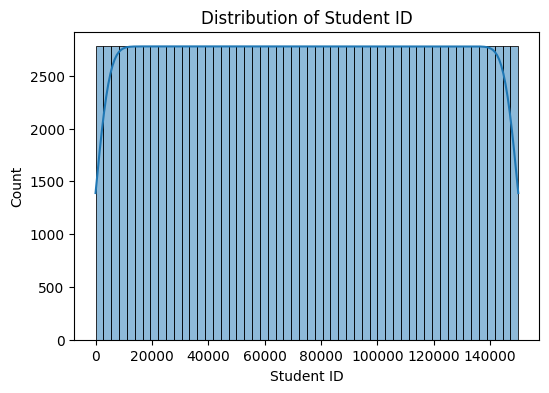

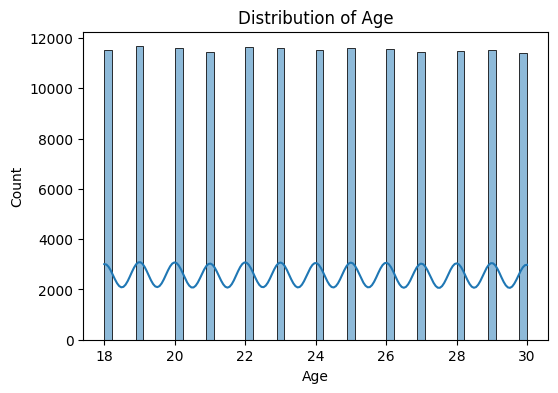

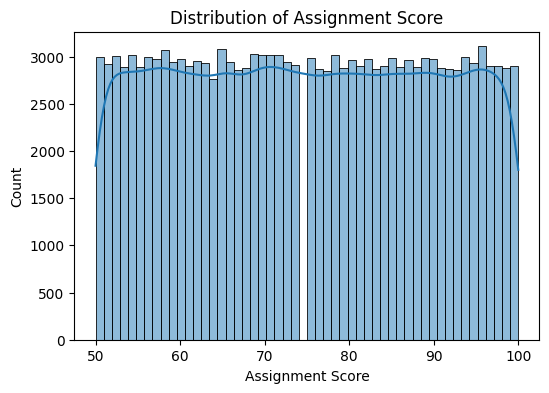

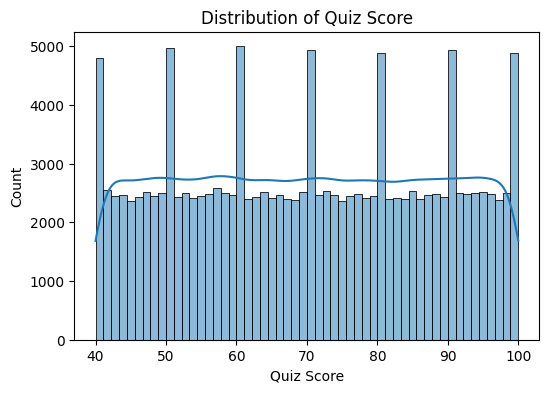

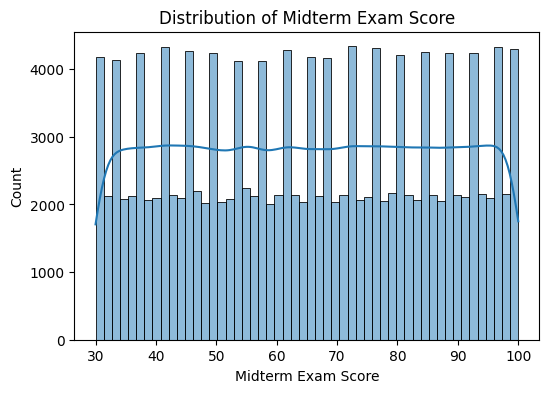

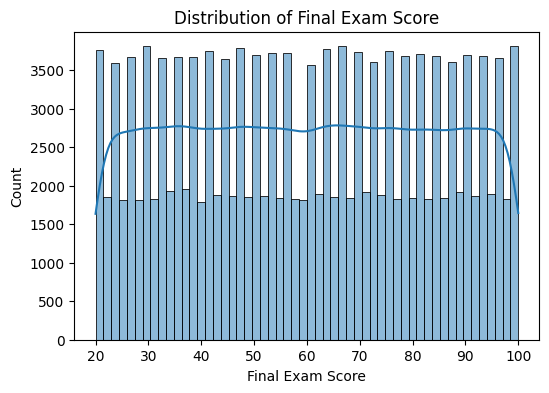

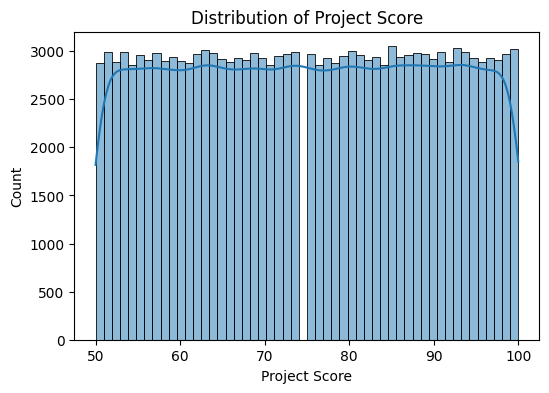

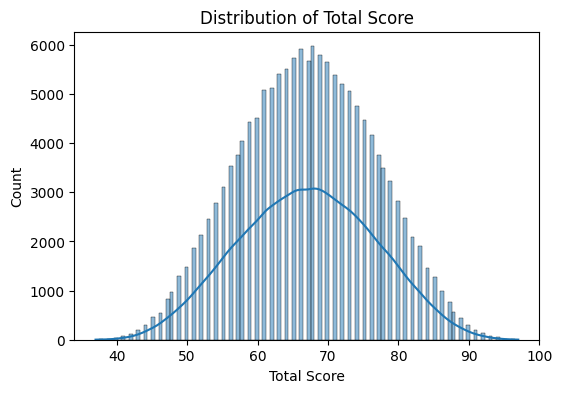

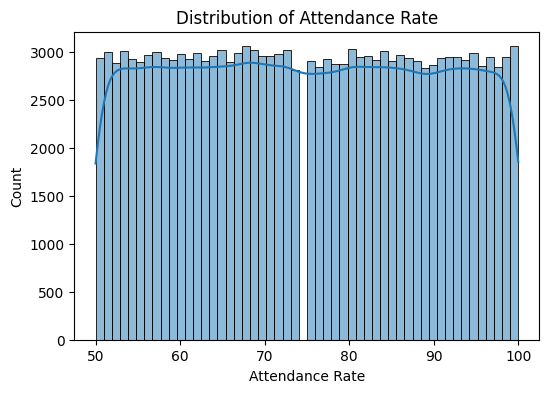

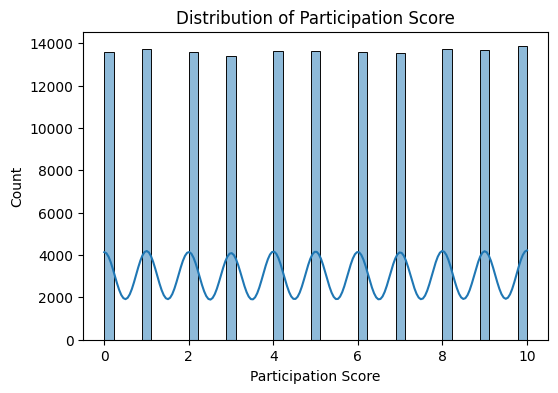

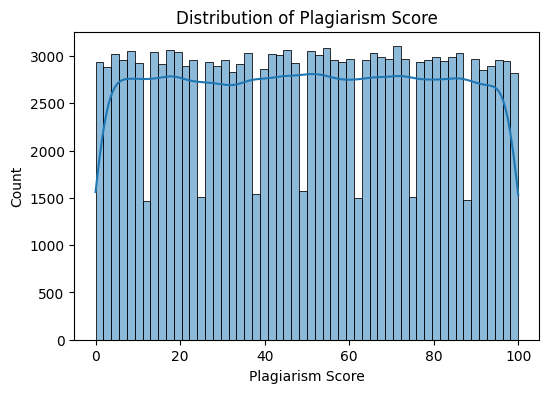

In [20]:
#distribution univariate for numerical columnSs

numeric_col=data.select_dtypes(include=['number']).columns
for col in numeric_col:
  plt.figure(figsize=(6,4))
  sns.histplot(data[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

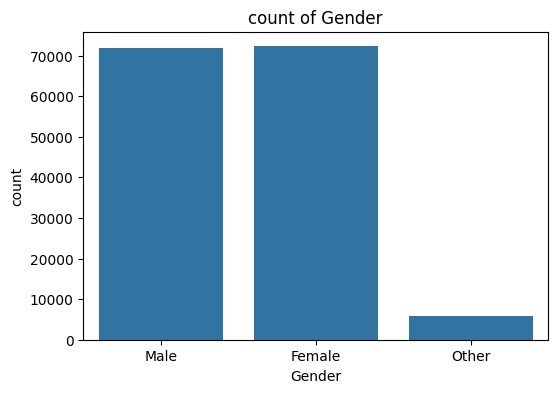

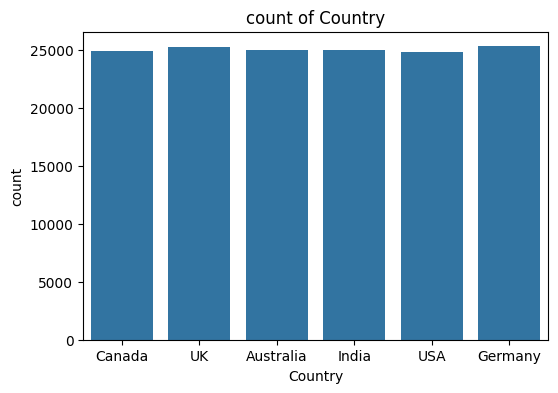

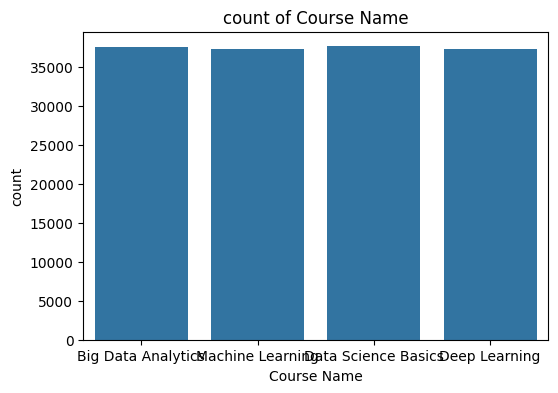

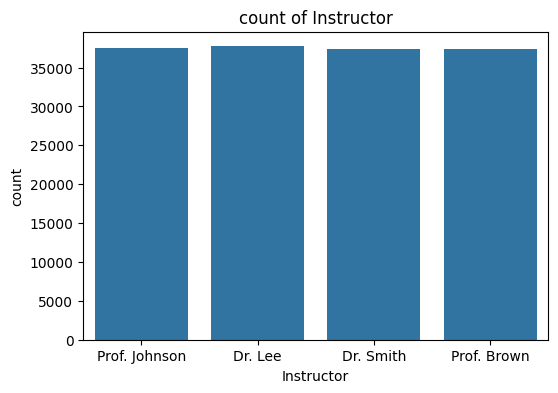

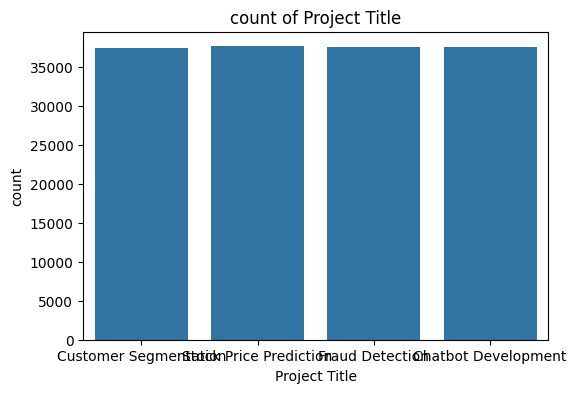

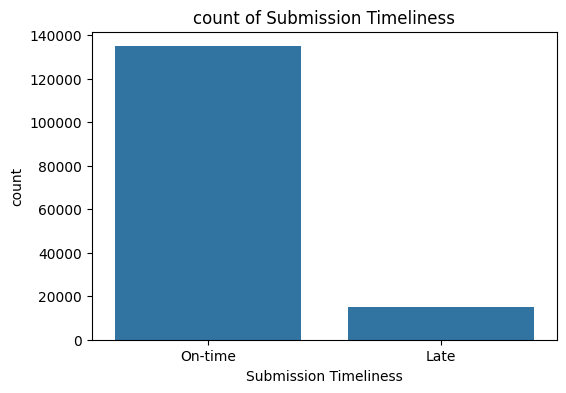

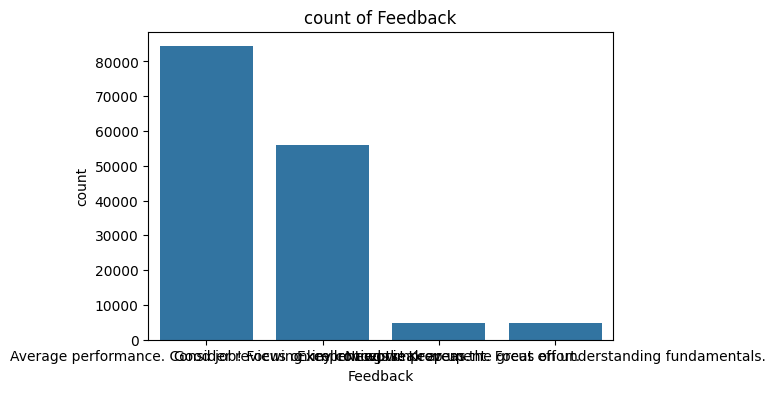

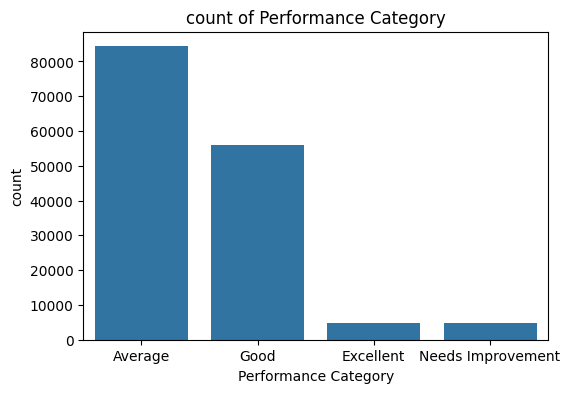

In [21]:
categorical_col=data.select_dtypes(include=['object']).columns
for col in categorical_col :
  plt.figure(figsize=(6,4))
  sns.countplot(x=data[col])
  plt.title(f'count of {col}')
  plt.show()